In [1]:
!wget https://archive.org/download/3dMnist/3d-mnist.zip

--2018-10-11 19:03:41--  https://archive.org/download/3dMnist/3d-mnist.zip
Resolving archive.org (archive.org)... 207.241.224.2
Connecting to archive.org (archive.org)|207.241.224.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ia601509.us.archive.org/29/items/3dMnist/3d-mnist.zip [following]
--2018-10-11 19:03:43--  https://ia601509.us.archive.org/29/items/3dMnist/3d-mnist.zip
Resolving ia601509.us.archive.org (ia601509.us.archive.org)... 207.241.227.119
Connecting to ia601509.us.archive.org (ia601509.us.archive.org)|207.241.227.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161420550 (154M) [application/zip]
Saving to: ‘3d-mnist.zip’

3d-mnist.zip        100%[===================>] 153.94M  3.62MB/s    in 38s     

2018-10-11 19:04:23 (4.10 MB/s) - ‘3d-mnist.zip’ saved [161420550/161420550]



In [2]:
ls

3D MNIST.ipynb  3d-mnist.zip


In [3]:
!unzip 3d-mnist.zip

Archive:  3d-mnist.zip
  inflating: full_dataset_vectors.h5  
  inflating: plot3D.py               
  inflating: test_point_clouds.h5    
  inflating: train_point_clouds.h5   
  inflating: voxelgrid.py            


In [4]:
ls

3D MNIST.ipynb  full_dataset_vectors.h5  test_point_clouds.h5   voxelgrid.py
3d-mnist.zip    plot3D.py                train_point_clouds.h5


In [5]:
import h5py
import numpy as np

with h5py.File('full_dataset_vectors.h5', "r") as f:
    X_train = f['X_train'][:]
    y_train = f['y_train'][:]
    X_test = f['X_test'][:]
    y_test = f['y_test'][:]    

In [6]:
print(len(X_train), len(y_train), X_train.shape, y_train.shape)
print(len(X_test), len(y_test), X_test.shape, y_test.shape)

10000 10000 (10000, 4096) (10000,)
2000 2000 (2000, 4096) (2000,)


### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train,y_train)
print("Accuracy: ", reg.score(X_test,y_test))

Accuracy:  0.582


### Decision Tree Classifier

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Accuracy: ", dt.score(X_test,y_test))

Accuracy:  0.4935


### Linear Support Vector Classifier

In [9]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train,y_train)
print("Accuracy: ", svm.score(X_test,y_test))

Accuracy:  0.558


### KNeighbors Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy: ", knn.score(X_test,y_test))

Accuracy:  0.5905


### Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)
print("Accuracy: ", rf.score(X_test,y_test))

/home/sandeepgogadi/anaconda3/envs/dl/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy:  0.6775


### 2D CNN

Using TensorFlow backend.
/home/sandeepgogadi/anaconda3/envs/dl/lib/python3.6/site-packages/keras_preprocessing/image.py:1183: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (8500, 16, 16, 16) (16 channels).
  ' channels).')
/home/sandeepgogadi/anaconda3/envs/dl/lib/python3.6/site-packages/keras_preprocessing/image.py:1404: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (8500, 16, 16, 16) (16 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


Training...
Epoch 1/30
 - 5s - loss: 1.9498 - acc: 0.3127 - val_loss: 1.2918 - val_acc: 0.5447
Epoch 2/30
 - 4s - loss: 1.3972 - acc: 0.5138 - val_loss: 1.2778 - val_acc: 0.5487
Epoch 3/30
 - 4s - loss: 1.2738 - acc: 0.5598 - val_loss: 1.1348 - val_acc: 0.5987
Epoch 4/30
 - 4s - loss: 1.2055 - acc: 0.5785 - val_loss: 1.0290 - val_acc: 0.6333
Epoch 5/30
 - 4s - loss: 1.1684 - acc: 0.5877 - val_loss: 1.0116 - val_acc: 0.6280
Epoch 6/30
 - 4s - loss: 1.1251 - acc: 0.6038 - val_loss: 1.2305 - val_acc: 0.5847
Epoch 7/30
 - 4s - loss: 1.0986 - acc: 0.6172 - val_loss: 0.9733 - val_acc: 0.6547
Epoch 8/30
 - 4s - loss: 1.0763 - acc: 0.6192 - val_loss: 1.0470 - val_acc: 0.6453
Epoch 9/30
 - 4s - loss: 1.0466 - acc: 0.6329 - val_loss: 0.9640 - val_acc: 0.6533
Epoch 10/30
 - 5s - loss: 1.0287 - acc: 0.6363 - val_loss: 0.9589 - val_acc: 0.6620
Epoch 11/30
 - 4s - loss: 1.0171 - acc: 0.6396 - val_loss: 0.9575 - val_acc: 0.6587
Epoch 12/30
 - 4s - loss: 1.0080 - acc: 0.6399 - val_loss: 0.9699 - val_a

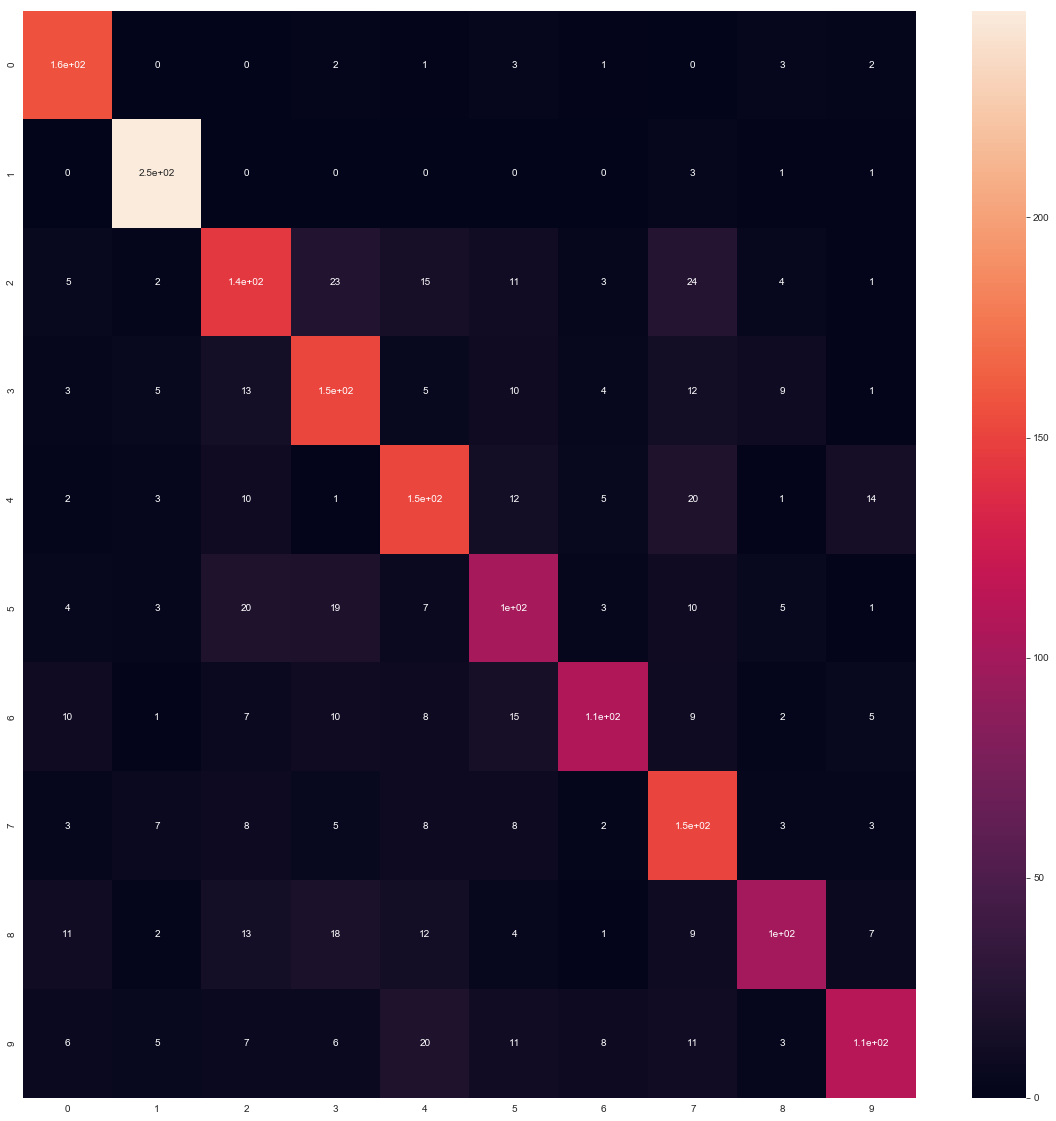

Model Saved.


In [12]:
%matplotlib inline

from __future__ import division, print_function, absolute_import

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, TensorBoard

import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Hyper Parameter
batch_size = 86
epochs = 30

# Set up TensorBoard
tensorboard = TensorBoard(batch_size=batch_size)

with h5py.File("full_dataset_vectors.h5", 'r') as h5:
    X_train, y_train = h5["X_train"][:], h5["y_train"][:]
    X_test, y_test = h5["X_test"][:], h5["y_test"][:]



y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

X_train = X_train.reshape(-1, 16, 16, 16)
X_test  = X_test.reshape(-1, 16, 16, 16)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Conv2D layer
def Conv(filters=16, kernel_size=(3,3), activation='relu', input_shape=None):
    if input_shape:
        return Conv2D(filters=filters, kernel_size=kernel_size, padding='Same', activation=activation, input_shape=input_shape)
    else:
        return Conv2D(filters=filters, kernel_size=kernel_size, padding='Same', activation=activation)

# Define Model
def CNN(input_dim, num_classes):
    model = Sequential()

    model.add(Conv(8, (3,3), input_shape=input_dim))
    model.add(Conv(16, (3,3)))
    # model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv(32, (3,3)))
    model.add(Conv(64, (3,3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D())
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

# Train Model
def train(optimizer, scheduler, gen):
    global model

    print("Training...")
    model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

    model.fit_generator(gen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs, validation_data=(X_val, y_val),
                    verbose=2, steps_per_epoch=X_train.shape[0]//batch_size,
                    callbacks=[scheduler, tensorboard])
def evaluate():
    global model

    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)

    print(accuracy_score(pred,y_test))
    # Heat Map
    array = confusion_matrix(y_test, pred)
    cm = pd.DataFrame(array, index = range(10), columns = range(10))
    plt.figure(figsize=(20,20))
    sns.heatmap(cm, annot=True)
    plt.show()

def save_model():
    global model

    model_json = model.to_json()
    with open('model_2D.json', 'w') as f:
        f.write(model_json)

    model.save_weights('model_2D.h5')

    print('Model Saved.')

def load_model():
    f = open('model_2D.json', 'r')
    model_json = f.read()
    f.close()

    loaded_model = model_from_json(model_json)
    loaded_model.load_weights('model_2D.h5')

    print("Model Loaded.")
    return loaded_model

if __name__ == '__main__':

    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    scheduler = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=1e-5)

    model = CNN((16,16,16), 10)

    gen = ImageDataGenerator(rotation_range=10, zoom_range = 0.1, width_shift_range=0.1, height_shift_range=0.1)
    gen.fit(X_train)

    train(optimizer, scheduler, gen)
    evaluate()
    save_model()

### 3D CNN

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
0
1000
Training...
Train on 8500 samples, validate on 1500 samples
Epoch 1/30
 - 11s - loss: 3.0609 - acc: 0.1512 - val_loss: 5.2800 - val_acc: 0.1113
Epoch 2/30
 - 10s - loss: 1.5903 - acc: 0.4475 - val_loss: 2.1095 - val_acc: 0.4207
Epoch 3/30
 - 10s - loss: 1.2178 - acc: 0.5773 - val_loss: 1.8678 - val_acc: 0.4613
Epoch 4/30
 - 10s - loss: 1.0962 - acc: 0.6182 - val_loss: 1.0660 - val_acc: 0.6227
Epoch 5/30
 - 10s - loss: 1.0134 - acc: 0.6442 - val_loss: 1.0814 - val_acc: 0.6213
Epoch 6/30
 - 10s - loss: 0.9351 - acc: 0.6702 - val_loss: 0.9996 - val_acc: 0.6693
Epoch 7/30
 - 10s - loss: 0.8821 - acc: 0.6931 - val_loss: 0.8671 - val_acc: 0.6947
Epoch 8/30
 - 10s - loss: 0.8083 - acc: 0.7160 - val_loss: 0.9180 - val_acc: 0.6887
Epoch 9/30
 - 10s - loss: 0.7377 - acc: 0.7424 - val_loss: 0.8913 - val_acc: 0.6993
Epoch 10/30
 - 10s - loss: 0.6426 - acc: 0.7809 - val_loss: 0.8335 - val_acc: 0.7187
Epoch 11/30
 - 10s - loss: 0.5891 - acc: 0.79

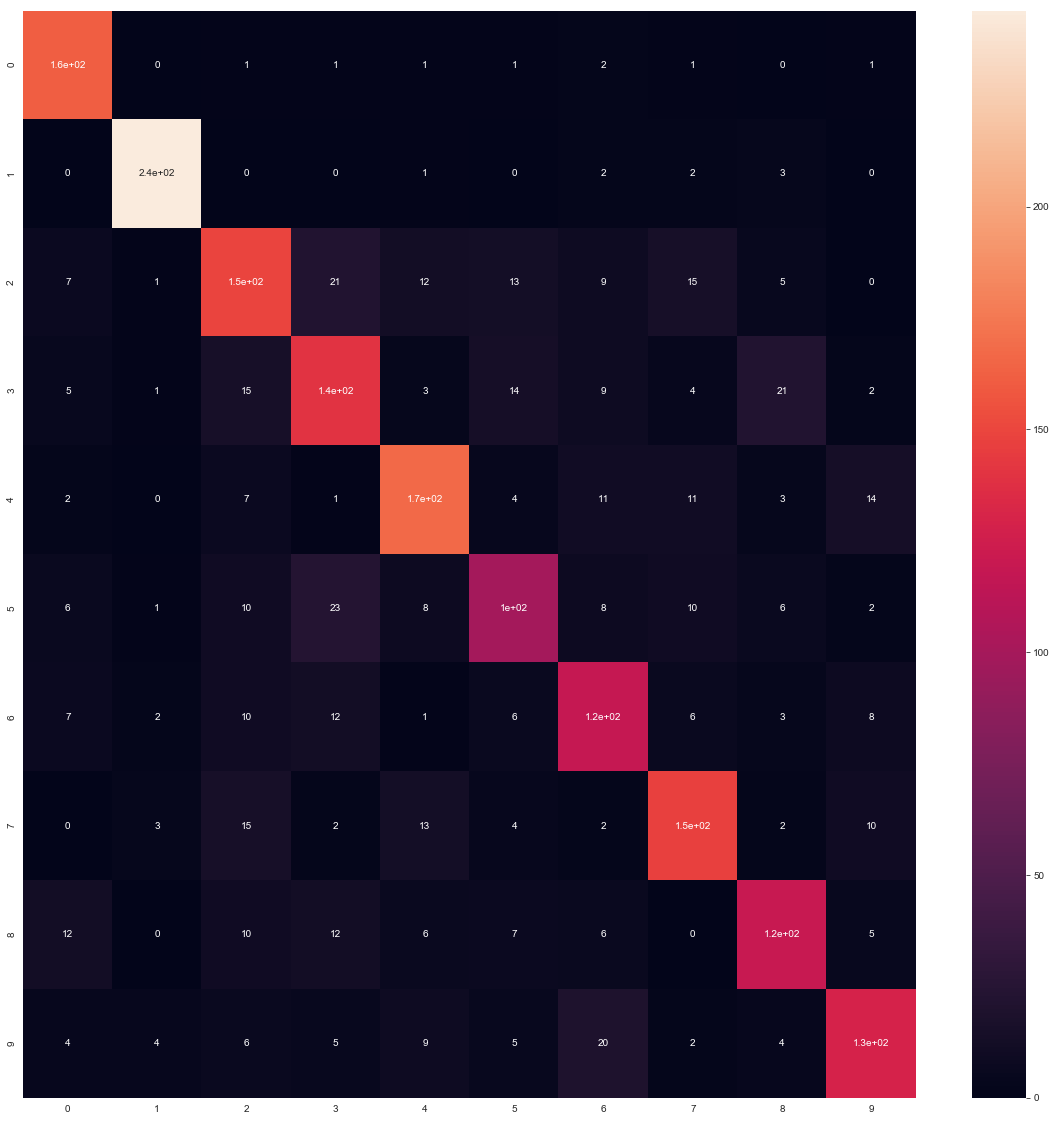

Model Saved.


In [13]:
%matplotlib inline

from __future__ import division, print_function, absolute_import

from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPool3D, BatchNormalization, Input
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, TensorBoard

import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

from sklearn.metrics import confusion_matrix, accuracy_score

# Hyper Parameter
batch_size = 86
epochs = 30

# Set up TensorBoard
tensorboard = TensorBoard(batch_size=batch_size)

with h5py.File("full_dataset_vectors.h5", 'r') as h5:
    X_train, y_train = h5["X_train"][:], h5["y_train"][:]
    X_test, y_test = h5["X_test"][:], h5["y_test"][:]

# Translate data to color
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)
    return s_m.to_rgba(array)[:,:-1]

def translate(x):
    xx = np.ndarray((x.shape[0], 4096, 3))
    for i in range(x.shape[0]):
        xx[i] = array_to_color(x[i])
        if i % 1000 == 0:
            print(i)
    # Free Memory
    del x

    return xx

y_train = to_categorical(y_train, num_classes=10)
# y_test = to_categorical(y_test, num_classes=10)

X_train = translate(X_train).reshape(-1, 16, 16, 16, 3)
X_test  = translate(X_test).reshape(-1, 16, 16, 16, 3)

# Conv2D layer
def Conv(filters=16, kernel_size=(3,3,3), activation='relu', input_shape=None):
    if input_shape:
        return Conv3D(filters=filters, kernel_size=kernel_size, padding='Same', activation=activation, input_shape=input_shape)
    else:
        return Conv3D(filters=filters, kernel_size=kernel_size, padding='Same', activation=activation)

# Define Model
def CNN(input_dim, num_classes):
    model = Sequential()

    model.add(Conv(8, (3,3,3), input_shape=input_dim))
    model.add(Conv(16, (3,3,3)))
    # model.add(BatchNormalization())
    model.add(MaxPool3D())
    # model.add(Dropout(0.25))

    model.add(Conv(32, (3,3,3)))
    model.add(Conv(64, (3,3,3)))
    model.add(BatchNormalization())
    model.add(MaxPool3D())
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    return model

# Train Model
def train(optimizer, scheduler):
    global model

    print("Training...")
    model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

    model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15,
                    verbose=2, callbacks=[scheduler, tensorboard])

def evaluate():
    global model

    pred = model.predict(X_test)
    pred = np.argmax(pred, axis=1)

    print(accuracy_score(pred,y_test))
    # Heat Map
    array = confusion_matrix(y_test, pred)
    cm = pd.DataFrame(array, index = range(10), columns = range(10))
    plt.figure(figsize=(20,20))
    sns.heatmap(cm, annot=True)
    plt.show()

def save_model():
    global model

    model_json = model.to_json()
    with open('model_3D.json', 'w') as f:
        f.write(model_json)

    model.save_weights('model_3D.h5')

    print('Model Saved.')

def load_model():
    f = open('model_3D.json', 'r')
    model_json = f.read()
    f.close()

    loaded_model = model_from_json(model_json)
    loaded_model.load_weights('model_3D.h5')

    print("Model Loaded.")
    return loaded_model

if __name__ == '__main__':

    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    scheduler = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=1e-5)

    model = CNN((16,16,16,3), 10)

    train(optimizer, scheduler)
    evaluate()
    save_model()